In [374]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Visualization

In [375]:
df = pd.read_csv('/users/jorge/desktop/data visualization/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [376]:
print('data shape:', df.shape)
print('data dim:', df.ndim)
print(type(df))

data shape: (891, 12)
data dim: 2
<class 'pandas.core.frame.DataFrame'>


### data information

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [378]:
df.isnull().sum() #Checking Null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Scatterplot using seaborn

<AxesSubplot:xlabel='Age', ylabel='Fare'>

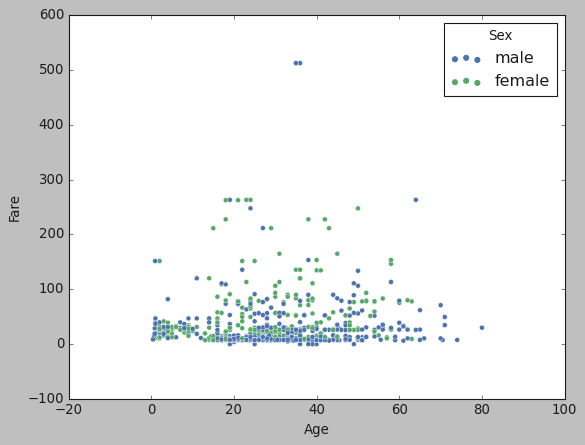

In [379]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex')

### chart pie using matplotlib

<AxesSubplot:ylabel='PassengerId'>

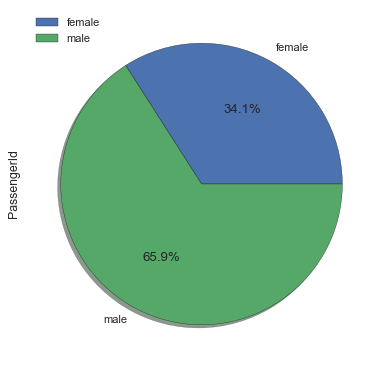

In [380]:
plt.style.use('seaborn')
df.groupby(['Sex']).sum().plot(kind= 'pie', y= 'PassengerId', shadow = True, autopct='%1.1f%%')

### survival passengers

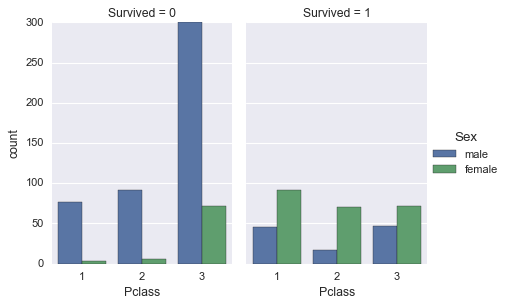

In [381]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', # 0 = No, 1 = Yes
            data=df, kind='count',
            height=4, aspect=.7);

### Which gender had a better chance of survival

<AxesSubplot:xlabel='count', ylabel='Survived'>

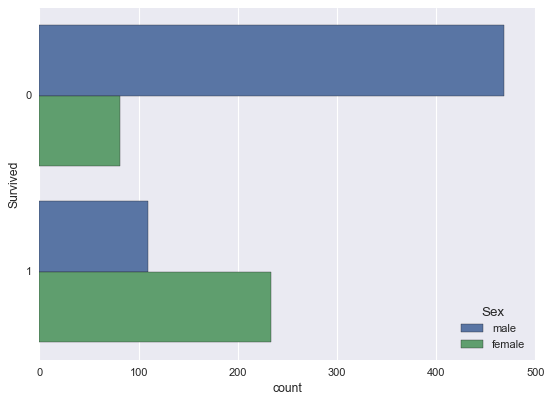

In [382]:
sns.countplot(y='Survived', hue='Sex', data=df)
#We can see clearly by visualization that females had a better chance of survival

### survival rate #siblings / Spouse

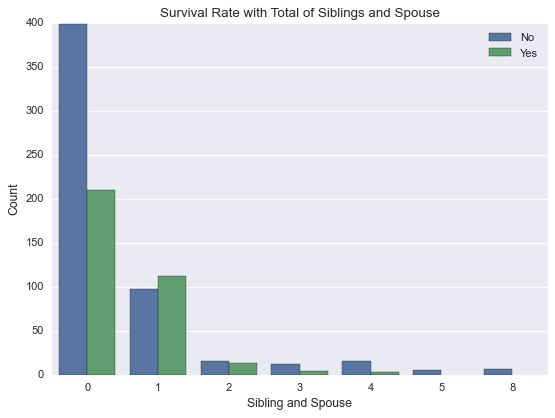

In [383]:
fig = plt.figure()
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data = df)
ax.set_title('Survival Rate with Total of Siblings and Spouse')
ax.set_xlabel('Sibling and Spouse')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)

### survival rate #parents / children

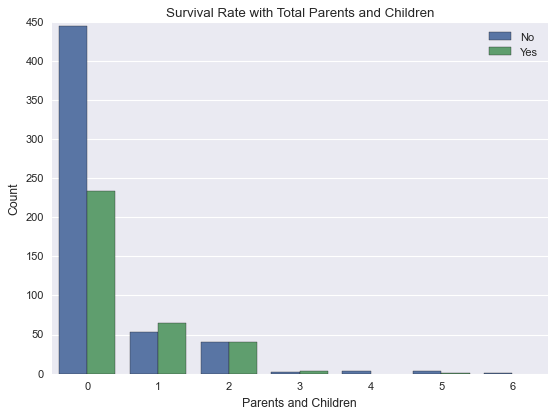

In [384]:
fig = plt.figure()
ax = sns.countplot(x = 'Parch', hue = 'Survived', data = df)
ax.set_title('Survival Rate with Total Parents and Children')
ax.set_xlabel('Parents and Children')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)

### survival sorted by class

In [385]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

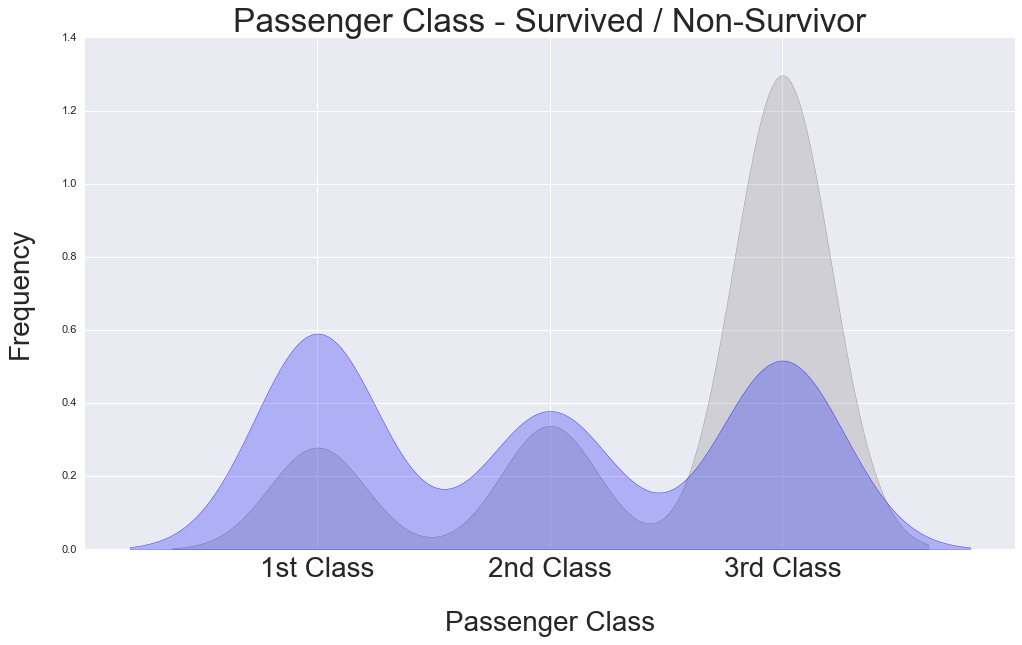

In [388]:
fig = plt.figure(figsize=(15,8),)
sns.kdeplot(df.Pclass[df.Survived == 0] ,
               color='grey',
               shade=True,
               label='not survived')
sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'] ,
               color='blue',
               shade=True,
               label='survived',
              )
plt.title('Passenger Class - Survived / Non-Survivor', fontsize = 30)
plt.ylabel("Frequency", fontsize = 25, labelpad = 35)
plt.xlabel("Passenger Class", fontsize = 25,labelpad =25)
labels = ['1st Class', '2nd Class', '3rd Class']
plt.xticks(sorted(df.Pclass.unique()), labels, fontsize = 25);

### survival sorted by age

Text(0.5, 0, 'Passenger Age')

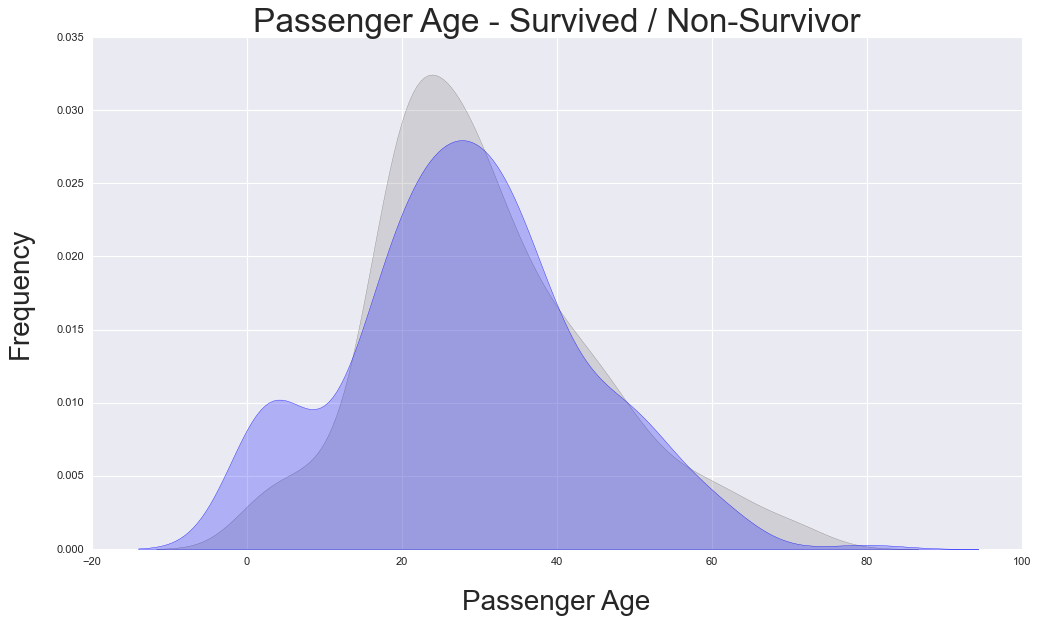

In [387]:
fig = plt.figure(figsize=(15,8),)
sns.kdeplot(df.Age[df.Survived == 0] ,
               color='grey',
               shade=True,
               label='not survived')
sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] ,
               color='blue',
               shade=True,
               label='survived',
              )
plt.title('Passenger Age - Survived / Non-Survivor', fontsize = 30)
plt.ylabel("Frequency", fontsize = 25, labelpad = 20)
plt.xlabel("Passenger Age", fontsize = 25,labelpad =20)